In [1]:
from matplotlib import pyplot as plt
from upsetplot import UpSet, from_memberships
from  google.cloud import bigquery
import pandas as pd
import numpy as np

In [3]:
client = bigquery.Client()
query = "SELECT * FROM `table_id` "
df = client.query(query)
df= df.to_dataframe()
# Drop last row (nulls)
df = df[:327]
df.tail()

,distinct_touchpoints,total_paths
322,Display-Causal IQ-Prospecting&&Display-DV360-R...,56
323,Display-DV360-Remarketing&&Display-Matterkind-...,56
324,Display-DV360-Prospecting&&SEM-Google-Prospect...,56
325,Display-Causal IQ-Prospecting&&Display-DV360-P...,55
326,Display-DV360-Prospecting&&Display-DV360-Remar...,55


In [4]:
# Prepare data for library UpSet
df_filter = df[df['total_paths']>300]
category = list(df_filter.distinct_touchpoints.str.split('&&').values)
values = list(df_filter.total_paths.values)

{'matrix': <AxesSubplot:>,
 'shading': <AxesSubplot:>,
 'totals': <AxesSubplot:>,
 'intersections': <AxesSubplot:ylabel='Conversions'>}

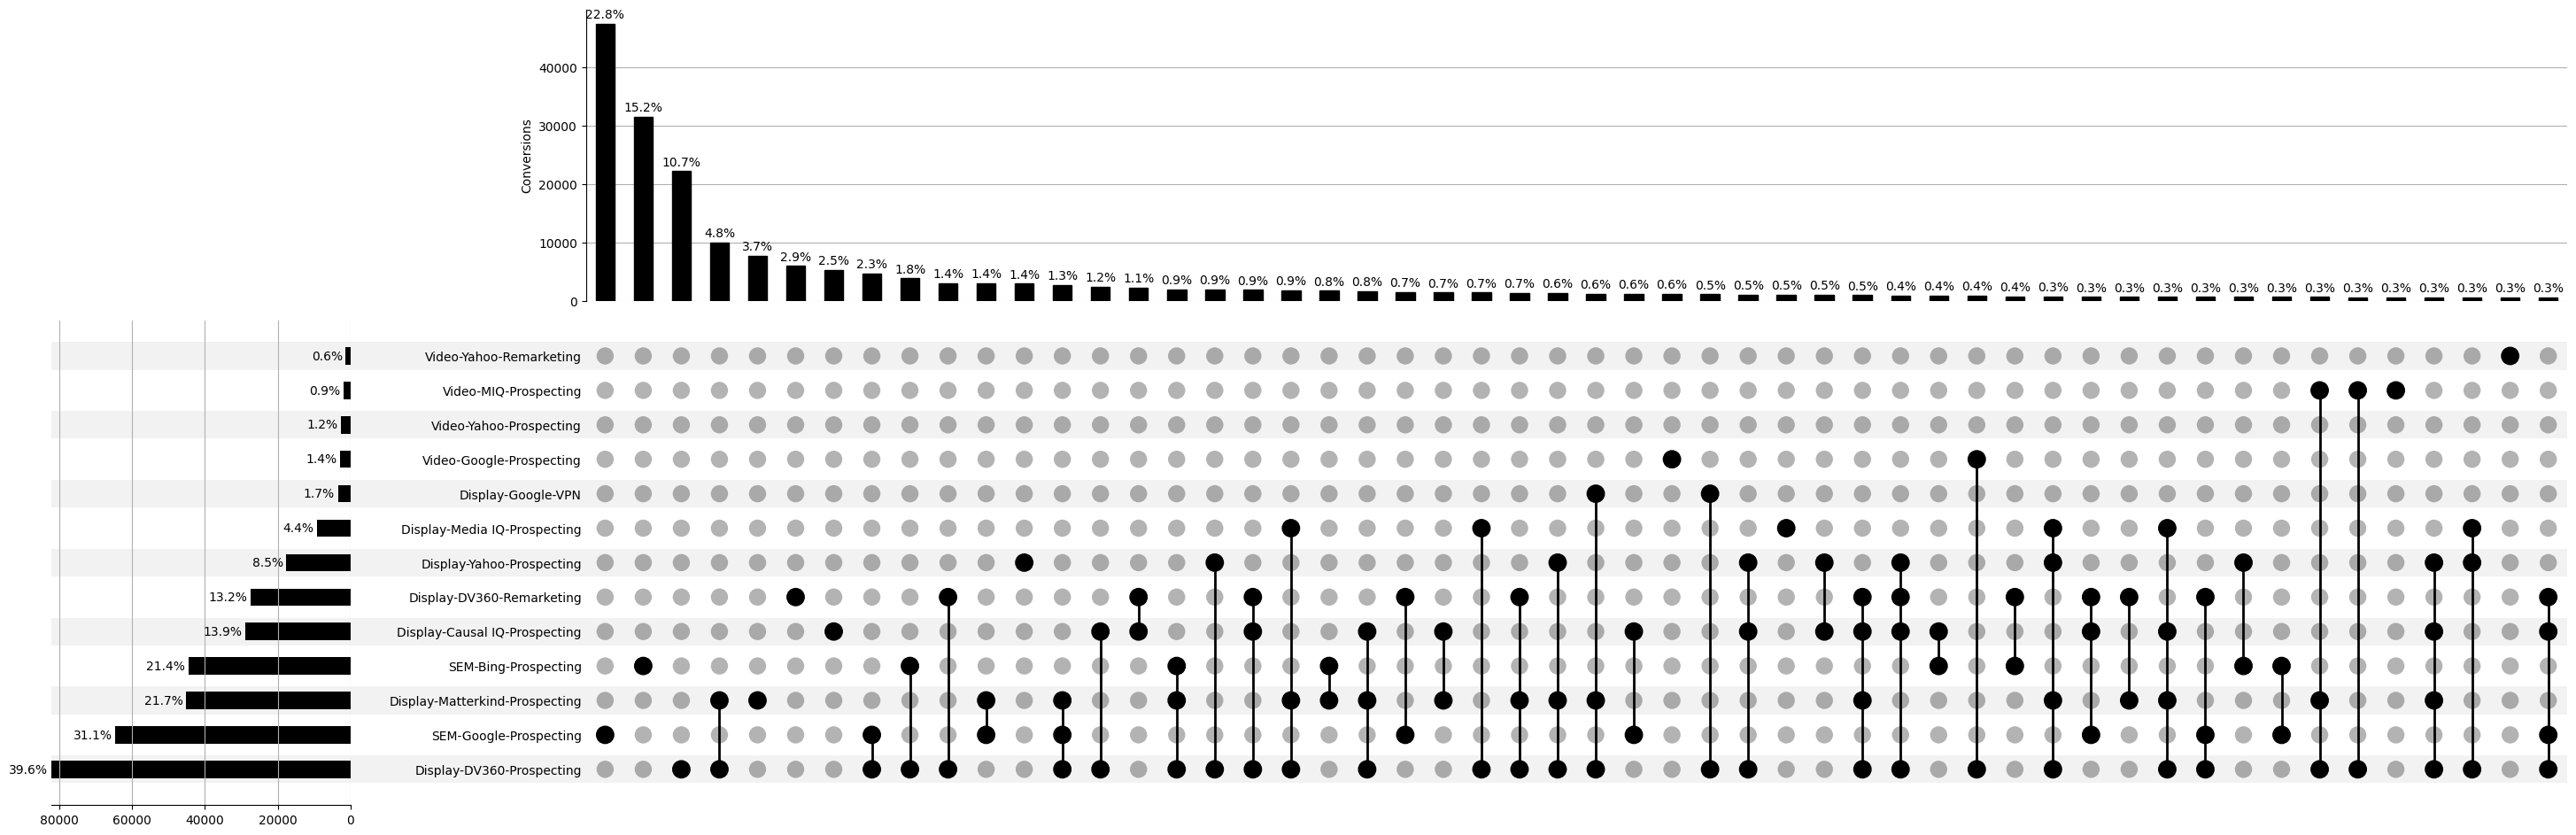

In [5]:
data2plot = from_memberships(category,data=values)

plt = UpSet(
    data2plot,
    subset_size='sum',
    element_size=40,
    #show_counts='%d',
    sort_by='cardinality', 
    intersection_plot_elements=8,
    show_percentages=True,
    min_subset_size=550,
    min_degree=1,
    totals_plot_elements=8,
    other_dots_color=0.3
    )

plt.plot()

In [6]:
df['touchpoints_list'] = df.distinct_touchpoints.str.split('&&')
df_att = df[['touchpoints_list', 'total_paths']]
df_att

,touchpoints_list,total_paths
0,[SEM-Google-Prospecting],47454
1,[SEM-Bing-Prospecting],31520
2,[Display-DV360-Prospecting],22158
3,"[Display-DV360-Prospecting, Display-Matterkind...",9967
4,[Display-Matterkind-Prospecting],7719
...,...,...
322,"[Display-Causal IQ-Prospecting, Display-DV360-...",56
323,"[Display-DV360-Remarketing, Display-Matterkind...",56
324,"[Display-DV360-Prospecting, SEM-Google-Prospec...",56
325,"[Display-Causal IQ-Prospecting, Display-DV360-...",55
